In [1]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten
import numpy as np

In [26]:
# Initialising the resnet50
#classifier = VGG16(input_shape= (224,224,3),include_top=False,weights='imagenet')
#classifier = DenseNet121(input_shape= (224,224,3),include_top=False,weights='imagenet')
classifier = ResNet50( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights
#classifier = VGG19( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights
#classifier = InceptionV3( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights


classifier.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 47s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [27]:
#don't train existing weights
for layer in classifier.layers:
    layer.trainable = False

In [28]:
classifier1 = classifier.output#head model
classifier1 = Flatten()(classifier1)#adding layer of flatten
classifier1 = Dense(units=64, activation='relu')(classifier1)#adding layer of dense
classifier1 = Dense(units=1, activation='sigmoid')(classifier1)#again adding another layer of dense

In [29]:
model = Model(inputs = classifier.input , outputs = classifier1)
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 30,010,369 (114.48 MB)

 Trainable params: 6,422,657 (24.50 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [30]:
# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#use the image data generator to import the images from the dataset
#data augmentation
train_datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rescale = 1./255)

test_datagen = ImageDataGenerator(rescale=1. / 255)


#makes sure you provide the same target as initialised for the image size
training_set = train_datagen.flow_from_directory(r'C:\Users\VICTUS\OneDrive\Pictures\Covid-19-chest-x-ray-detection-main\Data\train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\VICTUS\OneDrive\Pictures\Covid-19-chest-x-ray-detection-main\Data\test',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='binary')


Found 189 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [31]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="my_model_vgg16.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [33]:
#fit the model
#it will take some time to train
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=10,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(test_set),
                              callbacks=[es,mc])

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1249 - loss: 0.4707
Epoch 1: val_accuracy did not improve from 0.30303
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.1587 - loss: 0.8015 - val_accuracy: 0.3030 - val_loss: 0.5959
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1737 - loss: 0.7540
Epoch 2: val_accuracy did not improve from 0.30303
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1587 - loss: 0.6857 - val_accuracy: 0.3030 - val_loss: 0.3569
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1562 - loss: 1.1798
Epoch 3: val_accuracy did not improve from 0.30303
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1587 - loss: 0.4498 - val_accuracy: 0.3030 - val_loss: 0.2339
Epoch 3: early stopping


In [34]:
#save model
model.save(r'C:\Users\VICTUS\OneDrive\Music\my_model_vgg16.h5')

In [35]:
#loading model
loaded_model = tf.keras.models.load_model(r'C:\Users\VICTUS\OneDrive\Music\my_model_vgg16.h5')
loaded_model.evaluate(test_set)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - accuracy: 0.3030 - loss: 0.2339


[0.2338782548904419, 0.3030303120613098]

In [36]:
#prediction of test set
y_pred = model.predict(test_set)
import numpy as np
y_pred = np.argmax(y_pred , axis=1)

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/stepWARNING:tensorflow:5 out of the last 52 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002101BB49240> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step  


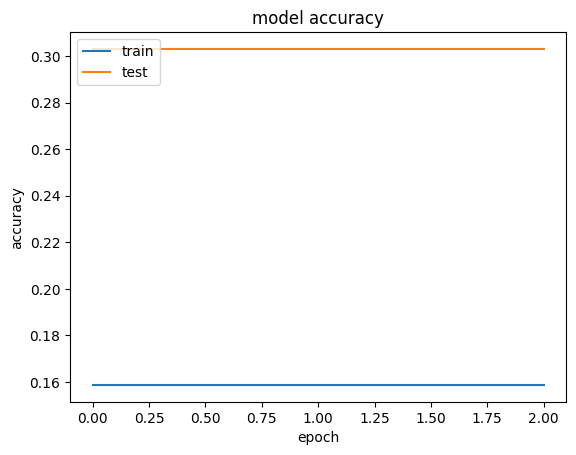

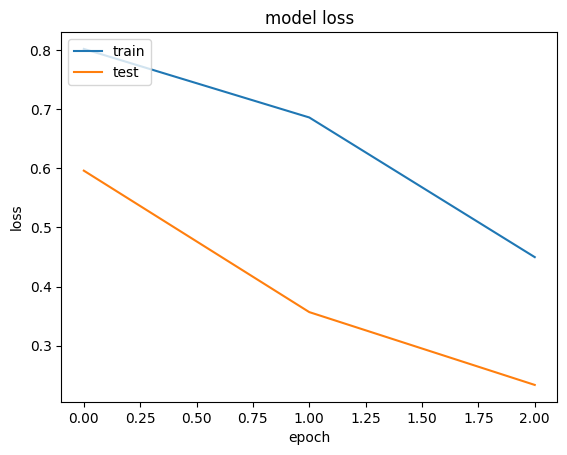

In [37]:
#plotting acc and loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
Normal


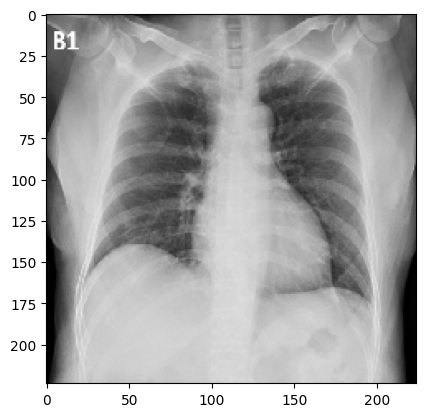

In [19]:
# for only one prediction
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(
    r'C:\Users\VICTUS\OneDrive\Pictures\Covid-19-chest-x-ray-detection-main\Data\test\Covid\094.png',
    target_size=(224,224))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = loaded_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

In [38]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Initialize lists
y_pred = []
y_test = []

# Define base paths
normal_path = r"C:\Users\VICTUS\OneDrive\Pictures\Covid-19-chest-x-ray-detection-main\Data\test\Normal"
covid_path = r"C:\Users\VICTUS\OneDrive\Pictures\Covid-19-chest-x-ray-detection-main\Data\test\Covid"

# Process Normal images
for img_name in os.listdir(normal_path):
    try:
        img_path = os.path.join(normal_path, img_name)
        img = image.load_img(img_path, target_size=(224,224))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        p = model.predict(img)
        y_test.append(p[0, 0])
        y_pred.append(1)  # Assuming 1 represents Normal
    except Exception as e:
        print(f"Error processing {img_name}: {str(e)}")

# Process Covid images
for img_name in os.listdir(covid_path):
    try:
        img_path = os.path.join(covid_path, img_name)
        img = image.load_img(img_path, target_size=(224,224))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        p = model.predict(img)
        y_test.append(p[0, 0])
        y_pred.append(0)  # Assuming 0 represents Covid
    except Exception as e:
        print(f"Error processing {img_name}: {str(e)}")

# Convert to numpy arrays
y_pred = np.array(y_pred)
y_test = np.array(y_test).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

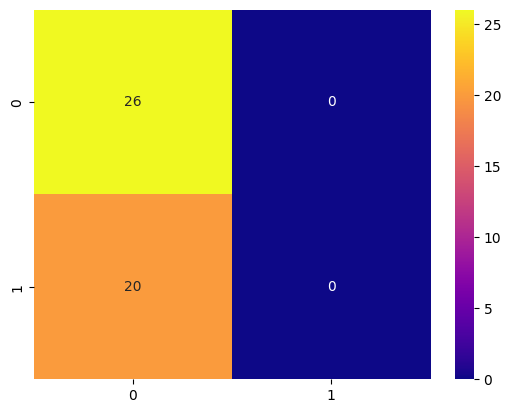

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        26
           1       0.00      0.00      0.00        20

    accuracy                           0.57        46
   macro avg       0.28      0.50      0.36        46
weighted avg       0.32      0.57      0.41        46



c:\Users\VICTUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\VICTUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\VICTUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, cmap="plasma", annot=True)
plt.show()

print(classification_report(y_pred, y_test))

In [40]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [41]:
import tensorflow as tf
print("TF Version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TF Version: 2.19.0
GPU Available: []


In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Load the saved model
model_path = r'C:\\Users\\VICTUS\\OneDrive\\Music\\my_model_vgg16.h5'
model = load_model(model_path)

# Define test data directory (same as in the notebook)
test_dir = r'C:\\Users\\VICTUS\\OneDrive\\Pictures\\Covid-19-chest-x-ray-detection-main\\Data\\test'

# Create test data generator (same parameters as in the notebook)
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for proper evaluation
)

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Generate predictions
predictions = model.predict(test_set)
predicted_classes = (predictions > 0.5).astype("int32")

# Get true labels
true_classes = test_set.classes

# Calculate additional metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

# Calculate and print precision, recall, f1-score for each class
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Optional: Visualize some predictions
import matplotlib.pyplot as plt

# Get a batch of test images
test_images, test_labels = next(test_set)

# Make predictions on this batch
batch_predictions = model.predict(test_images)
batch_predicted_classes = (batch_predictions > 0.5).astype("int32")

# Display some images with their predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i])
    plt.title(f"True: {test_labels[i]}\nPred: {batch_predicted_classes[i][0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Found 66 images belonging to 3 classes.


C:\Users\VICTUS\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 476ms/step - accuracy: 0.3030 - loss: 0.2339
Test Accuracy: 30.30%
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step  

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.30      1.00      0.47        20
           2       0.00      0.00      0.00        20

    accuracy                           0.30        66
   macro avg       0.10      0.33      0.16        66
weighted avg       0.09      0.30      0.14        66


Confusion Matrix:
[[ 0 26  0]
 [ 0 20  0]
 [ 0 20  0]]


c:\Users\VICTUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\VICTUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\VICTUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].